# Homework 1 (Support Vector Machines)

Using the data [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv), build the models as described below that use all the `X` variables (`X1`, `X2`... `X8`) to predict `Group`. Make sure that data is **z score appropriately**. Due to the number of models you're fitting with GridSearch, this make take a while to run.

- A. 💻 Load your data and do a 80/20 Train Test Split
- B. 💻 Use sklearn Pipelines to build an SVM model. Use `GridSearchCV` to choose the `kernel` (choose from `linear` and `rbf`), `C` (choose from `[0.001, 0.01, 1, 5, 25, 50]`), and `gamma` (choose from `[0.001,0.01, 0.1, 0.5, 1,2,5]`). Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.
- C. 💻 Use sklearn Pipelines to build a Logistic Regression on the same data with the same train/test set. Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices. ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/tree/master/Classwork)
- D. 💻 Use sklearn Pipelines to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose `n_neighbors`).Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.   ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/tree/master/Classwork))


In [31]:
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score

# models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# gridsearch
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv
df = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


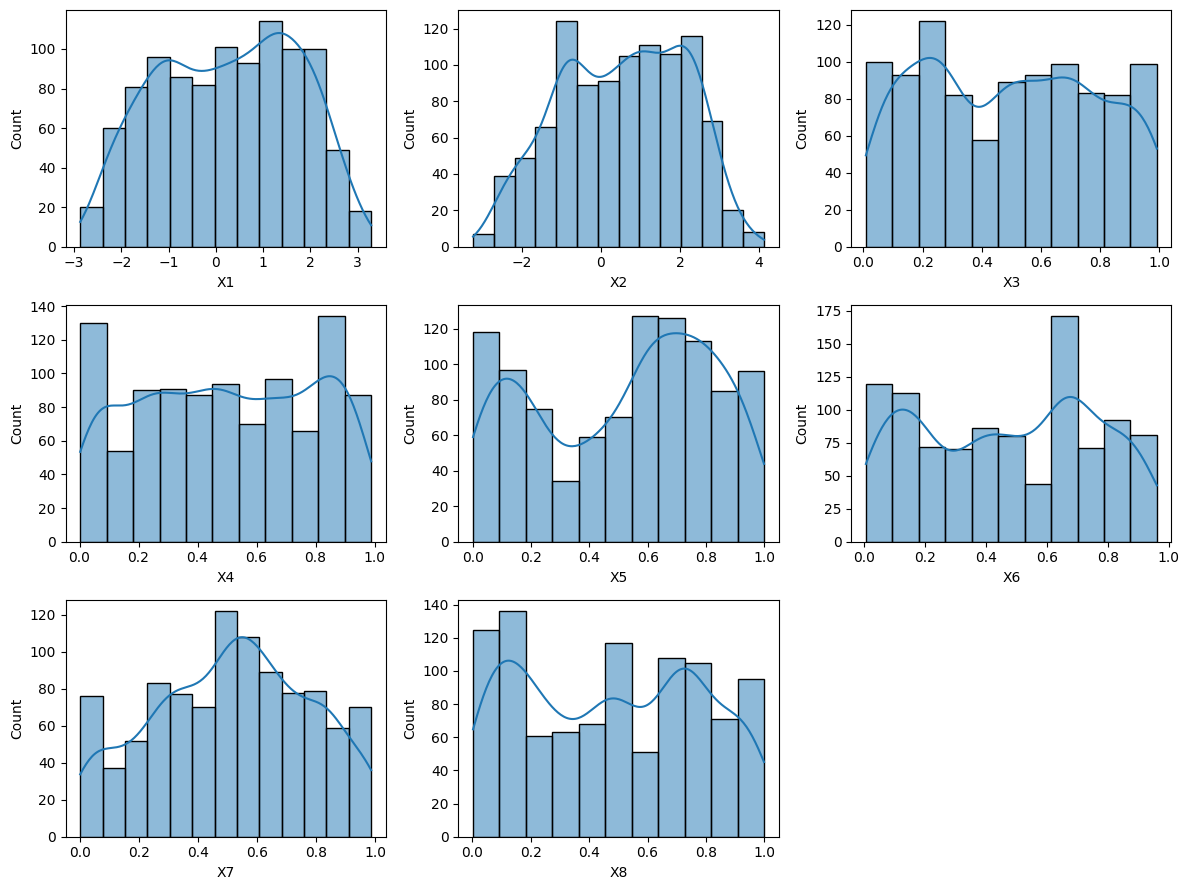

In [32]:
#sns.pairplot(df, hue='Group')
# ChatGPT for EDA Code to graph

plt.figure(figsize=(12, 9))

# Draw the plots

for i, column in enumerate(df.drop('Group', axis=1).columns):

    plt.subplot(3, 3, i+1)

    sns.histplot(df[column], kde=True)



# Adjust the layout

plt.tight_layout()

plt.show()

In [9]:
# split and organize data
# A. 💻 Load your data and do a 80/20 Train Test Split
pred = [x for x in df.columns if x != "Group"]
X = df[pred]
y = df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [11]:
# B. 💻 Use sklearn Pipelines to build an SVM model.
# Use GridSearchCV to choose the kernel (choose from linear and rbf),
# C (choose from [0.001, 0.01, 1, 5, 25, 50]),
# and gamma (choose from [0.001, 0.01, 0.1, 0.5, 1, 2, 5]).
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

z = make_column_transformer((StandardScaler(), pred),
                            remainder = "passthrough")

svm = SVC(probability=True, kernel = "poly")

pipe = make_pipeline(z, svm)

# print(pipe.get_params().keys())

params = {"svc__kernel": ["linear", "rbf"],
          "svc__C": [0.001, 0.01, 1, 5, 25, 50],
          "svc__gamma": [0.001, 0.01, 0.1, 0.5, 1, 2, 5]}

grid = GridSearchCV(pipe, params, cv = 5)

grid.fit(X_train, y_train)

print(grid.best_params_)

# {'svc__C': 50, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

{'svc__C': 50, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


Train Accuracy: 0.77625
Test Accuracy: 0.67

Train AUC: 0.8632140713484173
Test AUC : 0.7690977520089513



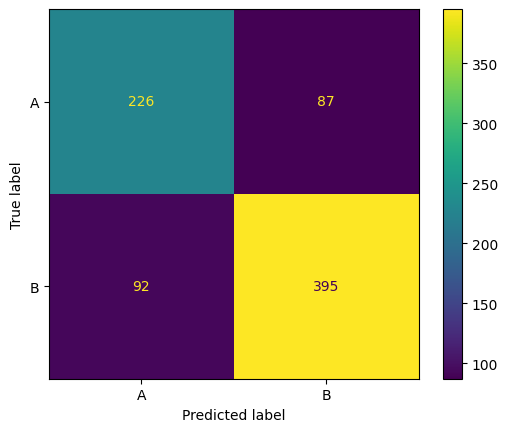

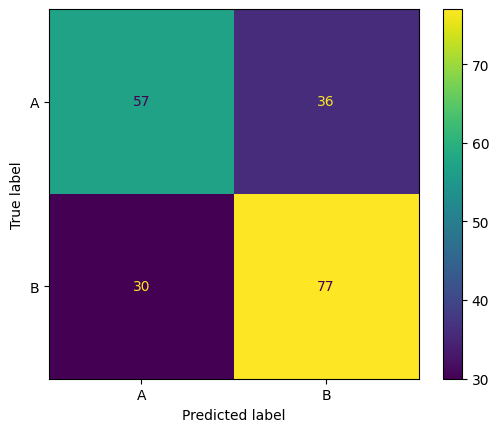

In [16]:
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.
# {'svc__C': 50, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
svm = SVC(probability=True,
          kernel = "rbf",
          C = 50,
          gamma = 0.001)

pipe = make_pipeline(z,svm)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, pipe.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print("Train AUC:", roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))
print()
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_train), y_train)
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_test), y_test)


Train Accuracy: 0.7825
Test Accuracy: 0.685

Train AUC: 0.8628748140609097
Test AUC : 0.7654358661377276



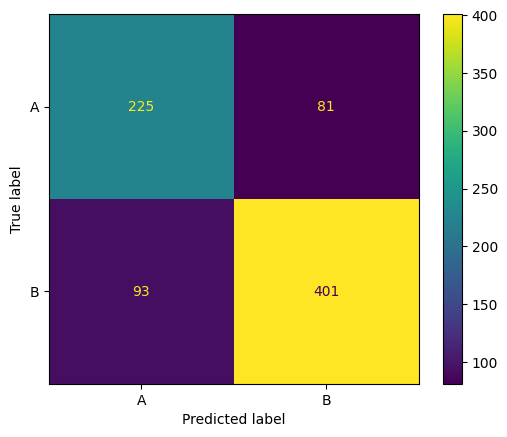

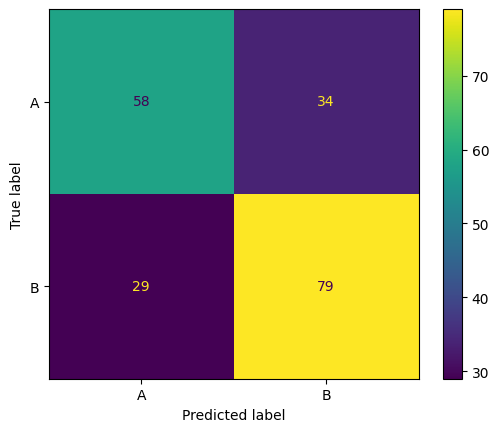

In [19]:
# C. 💻 Use sklearn Pipelines to build a Logistic Regression on the same data with the same train/test set.
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

z = make_column_transformer((StandardScaler(), pred),
                            remainder = "passthrough")

logreg = LogisticRegression()

pipe = make_pipeline(z, logreg)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, pipe.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print("Train AUC:", roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))
print()
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_train), y_train)
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_test), y_test)

In [24]:
# D. 💻 Use sklearn Pipelines to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose n_neighbors).
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

# create model
knn = KNeighborsClassifier()

# create z score object
z = make_column_transformer((StandardScaler(), pred),
                            remainder = "passthrough")

# make pipeline
pipe = Pipeline([("pre", z),
                ("model", knn)])

# GridSearch to choose n_neighbors

# choose potential values of k
ks = {"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]}

# use grid search to find best parameters
grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

grid.fit(X_train, y_train)

print("GridSearchCV chose: ", grid.best_estimator_.get_params()["model__n_neighbors"])


GridSearchCV chose:  9


Train Accuracy: 0.8125
Test Accuracy: 0.68

Train AUC: 0.8997984028810773
Test AUC : 0.7287152883735124



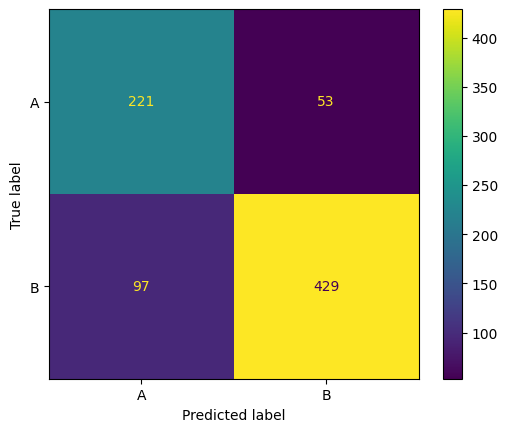

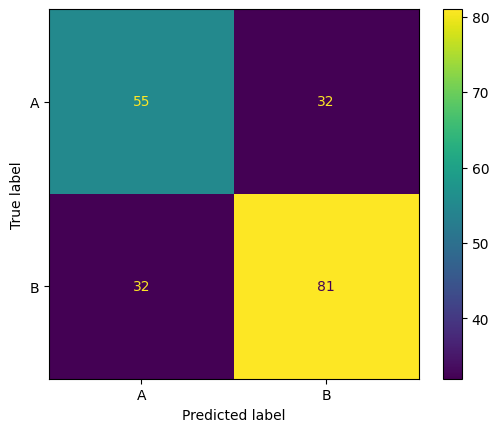

In [26]:
knn = KNeighborsClassifier(n_neighbors = 9)

z = make_column_transformer((StandardScaler(), pred),
                            remainder = "passthrough")

pipe = make_pipeline(z, knn)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, pipe.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print("Train AUC:", roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))
print()
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_train), y_train)
ConfusionMatrixDisplay.from_predictions(pipe.predict(X_test), y_test)

# Technical Report Sections

## Analysis
Any exploratory analysis of your data, and general summarization of the data (e.g. summary statistics, correlation heatmaps, graphs, information about the data...). Tell the reader about the types of variables you have and some general information about them, Plots and/or Tables are always great. This should also include any cleaning and joining you did.

If you want a table you can make one with [this website](https://www.tablesgenerator.com/markdown_tables) and paste the markdown table here. For example:

## Methods
Explain the structure of your models. **Including what hyperparemeter tuning you did, and the hyperparameters chosen. Also discuss what these hyperparameters control about the model**.  Someone should be able to read your methods section and *generally* be able to tell exactly what model you used. However REMEMBER that this should be geared towards an audience who might not understand sklearn code.

## Results
Discuss in detail how your models performed based on the metrics you printed. Write this discussion as if you are presenting your results to a CEO/Stakeholder. Compare the performance of your SVM model to the Logistic Regression and KNN model, and provide a justification for which model you want to use "in production".

## Reflection
Reflections on what you learned/discovered in the process of doing the assignment. Write about any struggles you had (and hopefully overcame) during the process. Things you would do differently in the future, ways you'll approach similar problems in the future, etc.



# What to Turn In

- PDF of your technical report (rendered through Quarto)
- your code as a .py, .ipynb, or link to github (you must turn it in either as a file, or a link to something that has timestamps of when the file was last edited)
- a README file as a .txt or .md